# New Zealand EDA

Goal of the project -
To recommend timeline for reopening/lockdown.
For this, the main quantities that we'll be trying to estimate throughout time for a given region are:
- Number of available beds at hospitals.
- Number of active cases.
- Number of cumulated deaths.
- Number of recovered.

In [1]:

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'C:\Users\DELL\Downloads\owid-covid-data.csv')


#df(owid-covid-data.csv) is a collection of the COVID-19 data maintained by Our World in Data.

In [2]:

#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


This data has 41 columns

In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [4]:
df.shape
# complete covid 19  world dataset 

(50011, 41)

In [5]:
#  data set have 50011 rows and 41 columns

# #EDA for New Zealand
from covid 19 world dataset Select data where location=New Zealand

In [6]:
df_nzl=df[(df['location']=='New Zealand')]

In [7]:
df_nzl.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34882,NZL,Oceania,New Zealand,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34883,NZL,Oceania,New Zealand,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34884,NZL,Oceania,New Zealand,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34885,NZL,Oceania,New Zealand,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917
34886,NZL,Oceania,New Zealand,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,36085.843,NaN,128.797,8.08,14.8,17.2,NaN,2.61,82.29,0.917


In [8]:
df_nzl.info()
#41 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         290 non-null    object 
 1   continent                        290 non-null    object 
 2   location                         290 non-null    object 
 3   date                             290 non-null    object 
 4   total_cases                      281 non-null    float64
 5   new_cases                        281 non-null    float64
 6   new_cases_smoothed               284 non-null    float64
 7   total_deaths                     281 non-null    float64
 8   new_deaths                       281 non-null    float64
 9   new_deaths_smoothed              284 non-null    float64
 10  total_cases_per_million          281 non-null    float64
 11  new_cases_per_million            281 non-null    float64
 12  new_cases_smooth

In [9]:
#new zealand has 290  entries

In [10]:
#sort the column 
df_nzl=df_nzl.reindex(sorted(df_nzl.columns), axis=1)

# Number of missing values per column.

In [11]:
# number of missing value per column
df_nzl.isnull().sum()

aged_65_older                        0
aged_70_older                        0
cardiovasc_death_rate                0
continent                            0
date                                 0
diabetes_prevalence                  0
extreme_poverty                    290
female_smokers                       0
gdp_per_capita                       0
handwashing_facilities             290
hospital_beds_per_thousand           0
human_development_index              0
iso_code                             0
life_expectancy                      0
location                             0
male_smokers                         0
median_age                           0
new_cases                            9
new_cases_per_million                9
new_cases_smoothed                   6
new_cases_smoothed_per_million       6
new_deaths                           9
new_deaths_per_million               9
new_deaths_smoothed                  6
new_deaths_smoothed_per_million      6
new_tests                

In [12]:

# remove the unnecessary columns
df_nzl.drop(['extreme_poverty','handwashing_facilities','date','location','iso_code','continent','location',
            'total_tests_per_thousand','total_deaths_per_million','total_cases_per_million',
            'new_tests_smoothed_per_thousand','new_tests_per_thousand',
            'new_tests_per_thousand','new_deaths_smoothed_per_million','new_deaths_per_million','new_cases_smoothed_per_million',
             'new_cases_per_million'],axis=1, inplace=True)
#

In [13]:
df_nzl.info()
#after drop 26 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   life_expectancy             290 non-null    float64
 9   male_smokers                290 non-null    float64
 10  median_age                  290 non-null    float64
 11  new_cases                   281 non-null    float64
 12  new_cases_smoothed          284 non-null    float64
 13  new_deaths                  2

In [14]:

# Impute the missing values with mean imputation
#df_nzl= df_nzl.fillna(df_nzl.mean())

In [15]:
df_nzl.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
life_expectancy                0
male_smokers                   0
median_age                     0
new_cases                      9
new_cases_smoothed             6
new_deaths                     9
new_deaths_smoothed            6
new_tests                     71
new_tests_smoothed            78
population                     0
population_density             0
positive_rate                 78
stringency_index               9
tests_per_case                96
tests_units                   71
total_cases                    9
total_deaths                   9
total_tests                   71
dtype: int64

In [67]:
#check the skewness of data
df_nzl.skew(axis = 0, skipna = True) 

aged_65_older                 0.000000
aged_70_older                 0.000000
cardiovasc_death_rate         0.000000
diabetes_prevalence           0.000000
female_smokers                0.000000
gdp_per_capita                0.000000
hospital_beds_per_thousand    0.000000
human_development_index       0.000000
life_expectancy               0.000000
male_smokers                  0.000000
median_age                    0.000000
new_cases                     4.093064
new_cases_smoothed            3.602781
new_deaths                    5.866464
new_deaths_smoothed           3.352933
new_tests                     2.541249
new_tests_smoothed            2.322346
population                    0.000000
population_density            0.000000
positive_rate                 3.457795
stringency_index              0.902152
tests_per_case                4.194971
total_cases                  -0.757121
total_deaths                 -0.553039
total_tests                   0.471441
dtype: float64

In [68]:
df_nzl.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,...,new_tests,new_tests_smoothed,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests
count,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,...,219.000000,212.000000,290.0,2.900000e+02,212.000000,281.000000,194.000000,281.000000,281.000000,2.190000e+02
mean,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,4666.383562,4712.330189,4822233.0,1.820600e+01,0.002792,39.010996,2960.401577,879.330961,14.395018,4.145765e+05
std,3.736798e-14,3.914740e-14,6.833001e-13,3.380912e-14,7.829481e-14,1.895019e-10,1.156628e-14,3.336427e-16,5.551814e-13,9.253023e-14,...,4105.716126,3536.857270,0.0,6.405939e-14,0.006976,29.448573,4194.561154,564.160521,10.467152,3.112206e+05
min,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,12.000000,106.000000,4822233.0,1.820600e+01,0.000000,0.000000,25.713000,0.000000,0.000000,3.120000e+02
25%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,2138.500000,2273.000000,4822233.0,1.820600e+01,0.000000,19.440000,1177.078250,28.000000,0.000000,1.514595e+05
50%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,3573.000000,3768.000000,4822233.0,1.820600e+01,0.001000,31.940000,1871.398500,1154.000000,22.000000,3.874350e+05
75%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,5956.500000,5854.000000,4822233.0,1.820600e+01,0.001000,68.980000,3349.410000,1219.000000,22.000000,6.653630e+05
max,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,26014.000000,21258.000000,4822233.0,1.820600e+01,0.039000,96.300000,28707.000000,1520.000000,25.000000,1.011657e+06


# Impute the missing values.
# If a features  have skewness replace it with median,if not repalce with mean mean.


In [69]:
df_nzl["new_cases"].describe()

count    281.000000
mean       5.409253
std       13.958604
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       95.000000
Name: new_cases, dtype: float64

In [70]:
df_nzl["new_cases"].median()

1.0

In [73]:
df_nzl["new_cases"].skew()

4.093063612922536

In [71]:
df_nzl["new_cases"].mean()

5.409252669039146

In [113]:
#repalcing new_cases with median value
df_nzl["new_cases"].fillna(df_nzl["new_cases"].median(), inplace = True)

##Impute the missing values of "new_cases_smoothed"

In [74]:
df_nzl["new_cases_smoothed"].describe()

count    284.000000
mean       5.336063
std       12.610182
min        0.000000
25%        0.107250
50%        1.286000
75%        3.286000
max       72.143000
Name: new_cases_smoothed, dtype: float64

In [75]:
df_nzl["new_cases_smoothed"].mean()

5.336063380281696

In [76]:
df_nzl["new_cases_smoothed"].median()

1.286

In [77]:
df_nzl["new_cases_smoothed"].skew()

3.602781227781091

In [ ]:
#we will repalce with meadian as it is skewed 3.602781227781091

In [78]:
df_nzl["new_cases_smoothed"].fillna(df_nzl["new_cases_smoothed"].median(), inplace = True)

In [81]:
df_nzl["new_tests"].describe()

count      219.000000
mean      4666.383562
std       4105.716126
min         12.000000
25%       2138.500000
50%       3573.000000
75%       5956.500000
max      26014.000000
Name: new_tests, dtype: float64

In [83]:
df_nzl["new_tests"].skew()

2.541248942899423

In [82]:
df_nzl["new_tests"].median()

3573.0

In [86]:
df_nzl["new_tests"].mean()

4666.3835616438355

In [87]:
df_nzl["new_tests"].fillna(df_nzl["new_tests"].median(), inplace = True)

In [88]:
df_nzl["new_tests_smoothed"].describe()

count      212.000000
mean      4712.330189
std       3536.857270
min        106.000000
25%       2273.000000
50%       3768.000000
75%       5854.000000
max      21258.000000
Name: new_tests_smoothed, dtype: float64

In [89]:
df_nzl["new_tests_smoothed"].skew()

2.322346160944261

In [90]:
df_nzl["new_tests_smoothed"].fillna(df_nzl["new_tests_smoothed"].median(), inplace = True)

In [92]:
#positive_rate
df_nzl["positive_rate"].describe()

count    212.000000
mean       0.002792
std        0.006976
min        0.000000
25%        0.000000
50%        0.001000
75%        0.001000
max        0.039000
Name: positive_rate, dtype: float64

In [93]:
df_nzl["positive_rate"].skew()

3.4577948054861936

In [95]:
df_nzl["positive_rate"].median()

0.001

In [96]:
df_nzl["positive_rate"].fillna(df_nzl["positive_rate"].median(), inplace = True)

In [97]:
# impute - stringency_index 
df_nzl["stringency_index"].describe()

count    281.000000
mean      39.010996
std       29.448573
min        0.000000
25%       19.440000
50%       31.940000
75%       68.980000
max       96.300000
Name: stringency_index, dtype: float64

In [98]:
df_nzl["stringency_index"].skew()

0.9021519952720499

In [99]:
df_nzl["stringency_index"].median()

31.94

In [ ]:
# impute - stringency_index  with mean

In [100]:
df_nzl["stringency_index"].fillna(df_nzl["stringency_index"].mean(), inplace = True)

In [ ]:
#impute missing value of tests_per_case

In [102]:
df_nzl["tests_per_case"].describe()

count      194.000000
mean      2960.401577
std       4194.561154
min         25.713000
25%       1177.078250
50%       1871.398500
75%       3349.410000
max      28707.000000
Name: tests_per_case, dtype: float64

In [104]:
df_nzl["tests_per_case"].median()

1871.3985

In [105]:
df_nzl["tests_per_case"].skew()

4.194971134873704

In [106]:
df_nzl["tests_per_case"].fillna(df_nzl["tests_per_case"].median(), inplace = True)

In [ ]:
#impute missing value of total_cases

In [107]:
df_nzl["total_cases"].describe()

count     281.000000
mean      879.330961
std       564.160521
min         0.000000
25%        28.000000
50%      1154.000000
75%      1219.000000
max      1520.000000
Name: total_cases, dtype: float64

In [108]:
df_nzl["total_cases"].skew()

-0.7571214414903531

In [ ]:
#replace the missing value of "new_deaths" with mean()

In [116]:
df_nzl["total_tests"].describe()

count    2.190000e+02
mean     4.145765e+05
std      3.112206e+05
min      3.120000e+02
25%      1.514595e+05
50%      3.874350e+05
75%      6.653630e+05
max      1.011657e+06
Name: total_tests, dtype: float64

In [117]:
df_nzl["total_tests"].skew()

0.47144093810340476

In [118]:

df_nzl["total_tests"].fillna(df_nzl["total_tests"].mean(), inplace = True)

In [ ]:
#replace the missing value of "total_cases" with mean()

In [109]:

df_nzl["total_cases"].fillna(df_nzl["total_cases"].mean(), inplace = True)

In [ ]:
#repalce missing value of total_deaths with mean()

In [110]:

df_nzl["total_deaths"].fillna(df_nzl["total_deaths"].mean(), inplace = True)

In [121]:
df_nzl["tests_units"].describe()

count                 219
unique                  1
top       tests performed
freq                  219
Name: tests_units, dtype: object

In [124]:
df_nzl["tests_units"].fillna(df_nzl["tests_units"].mode(), inplace = True)

In [125]:
df_nzl["new_deaths"].describe()

count    281.000000
mean       0.088968
std        0.390859
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: new_deaths, dtype: float64

In [126]:
df_nzl["new_deaths"].skew()

5.866463534141966

In [127]:
df_nzl["new_deaths"].median()

0.0

In [128]:
#missing value of "new_death" with mean value
df_nzl["new_deaths"].fillna(df_nzl["new_deaths"].mean(), inplace = True)

In [ ]:
df_nzl["new_deaths"].fillna(df_nzl["new_deaths"].mean(), inplace = True)

In [130]:
df_nzl["new_deaths_smoothed"].fillna(df_nzl["new_deaths_smoothed"].mean(), inplace = True)

In [134]:
df_nzl["tests_units"].isnull().sum()

71

In [135]:
df_nzl["tests_units"].describe()

count                 219
unique                  1
top       tests performed
freq                  219
Name: tests_units, dtype: object

In [144]:
df_nzl["tests_units"].mode()

0    tests performed
dtype: object

In [140]:
df_nzl["tests_units"].value_counts()

tests performed    219
Name: tests_units, dtype: int64

In [131]:
df_nzl.isnull().sum()

aged_65_older                  0
aged_70_older                  0
cardiovasc_death_rate          0
diabetes_prevalence            0
female_smokers                 0
gdp_per_capita                 0
hospital_beds_per_thousand     0
human_development_index        0
life_expectancy                0
male_smokers                   0
median_age                     0
new_cases                      0
new_cases_smoothed             0
new_deaths                     0
new_deaths_smoothed            0
new_tests                      0
new_tests_smoothed             0
population                     0
population_density             0
positive_rate                  0
stringency_index               0
tests_per_case                 0
tests_units                   71
total_cases                    0
total_deaths                   0
total_tests                    0
dtype: int64

In [145]:
#separate the object datatype and numerical data type
#df_nr_1_num=df_nr_1.select_dtypes(np.number)
#df_nr_1_obj=df_nr_1.select_dtypes('object')
df_nzl_obj=df_nzl.select_dtypes('object')
df_nzl_num=df_nzl.select_dtypes(np.number)

In [146]:
df_nzl_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tests_units  219 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [147]:
df_nzl_obj['tests_units'].value_counts()

tests performed    219
Name: tests_units, dtype: int64

In [148]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_nzl_obj['tests_units'])

In [149]:
# convert categorical vaiable (tests_units) to numeric 
df_nzl_num = pd.concat([df_nzl_num,test_performed], axis=1)
print(df_nzl_num)


       aged_65_older  aged_70_older  cardiovasc_death_rate  \
34882         15.322           9.72                128.797   
34883         15.322           9.72                128.797   
34884         15.322           9.72                128.797   
34885         15.322           9.72                128.797   
34886         15.322           9.72                128.797   
...              ...            ...                    ...   
35167         15.322           9.72                128.797   
35168         15.322           9.72                128.797   
35169         15.322           9.72                128.797   
35170         15.322           9.72                128.797   
35171         15.322           9.72                128.797   

       diabetes_prevalence  female_smokers  gdp_per_capita  \
34882                 8.08            14.8       36085.843   
34883                 8.08            14.8       36085.843   
34884                 8.08            14.8       36085.843   
34885  

In [150]:
df_nzl_num.info()
#34 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               290 non-null    float64
 1   aged_70_older               290 non-null    float64
 2   cardiovasc_death_rate       290 non-null    float64
 3   diabetes_prevalence         290 non-null    float64
 4   female_smokers              290 non-null    float64
 5   gdp_per_capita              290 non-null    float64
 6   hospital_beds_per_thousand  290 non-null    float64
 7   human_development_index     290 non-null    float64
 8   life_expectancy             290 non-null    float64
 9   male_smokers                290 non-null    float64
 10  median_age                  290 non-null    float64
 11  new_cases                   290 non-null    float64
 12  new_cases_smoothed          290 non-null    float64
 13  new_deaths                  2

In [151]:
df_nzl_num.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,...,new_tests_smoothed,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,tests performed
34882,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,3768.0,4822233.0,18.206,0.001,39.010996,1871.3985,0.0,0.0,414576.493151,0
34883,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,3768.0,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,0
34884,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,3768.0,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,0
34885,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,3768.0,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,0
34886,15.322,9.72,128.797,8.08,14.8,36085.843,2.61,0.917,82.29,17.2,...,3768.0,4822233.0,18.206,0.001,0.000000,1871.3985,0.0,0.0,414576.493151,0


In [152]:
# number of missing value per column for numerical datatypes
df_nzl_num.isnull().sum()

aged_65_older                 0
aged_70_older                 0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
gdp_per_capita                0
hospital_beds_per_thousand    0
human_development_index       0
life_expectancy               0
male_smokers                  0
median_age                    0
new_cases                     0
new_cases_smoothed            0
new_deaths                    0
new_deaths_smoothed           0
new_tests                     0
new_tests_smoothed            0
population                    0
population_density            0
positive_rate                 0
stringency_index              0
tests_per_case                0
total_cases                   0
total_deaths                  0
total_tests                   0
tests performed               0
dtype: int64

In [156]:
print(df_nzl_num.isnull().values.sum())

0


In [157]:
df_nzl_num.shape

(290, 26)

# Exploratory data analysis

# Univarate Analysis

In [158]:
df_nzl_num.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,...,new_tests_smoothed,population,population_density,positive_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,tests performed
count,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,2.900000e+02,...,290.000000,290.0,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.000000,2.900000e+02,290.000000
mean,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,4458.337931,4822233.0,1.820600e+01,0.002310,39.010996,2599.904007,879.330961,14.395018,4.145765e+05,0.755172
std,3.736798e-14,3.914740e-14,6.833001e-13,3.380912e-14,7.829481e-14,1.895019e-10,1.156628e-14,3.336427e-16,5.551814e-13,9.253023e-14,...,3051.078183,0.0,6.405939e-14,0.006013,28.986404,3466.033575,555.306537,10.302879,2.703010e+05,0.430728
min,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,106.000000,4822233.0,1.820600e+01,0.000000,0.000000,25.713000,0.000000,0.000000,3.120000e+02,0.000000
25%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,2860.000000,4822233.0,1.820600e+01,0.000000,19.440000,1544.093250,56.250000,0.000000,2.461900e+05,1.000000
50%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,3768.000000,4822233.0,1.820600e+01,0.001000,31.940000,1871.398500,1154.000000,21.000000,4.145765e+05,1.000000
75%,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,5133.500000,4822233.0,1.820600e+01,0.001000,51.042500,2445.139000,1217.000000,22.000000,4.717380e+05,1.000000
max,1.532200e+01,9.720000e+00,1.287970e+02,8.080000e+00,1.480000e+01,3.608584e+04,2.610000e+00,9.170000e-01,8.229000e+01,1.720000e+01,...,21258.000000,4822233.0,1.820600e+01,0.039000,96.300000,28707.000000,1520.000000,25.000000,1.011657e+06,1.000000


Visualization

[]

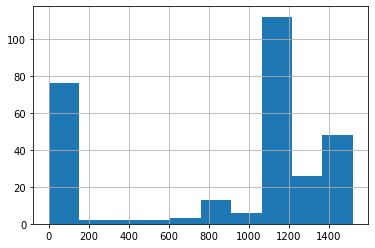

In [159]:
df_nzl_num.total_cases.hist()
plt.plot()

From the above image we see data is not normally distributed

In [ ]:
#total cases were high in the beginning after that it slow down then it increased

[]

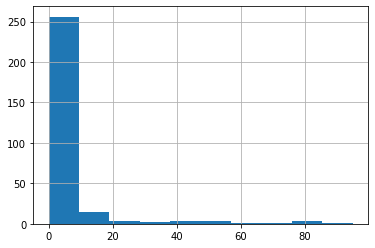

In [160]:
#new_cases_smoothed
df_nzl_num.new_cases.hist()
plt.plot()

From the above image we see data is not normally distributed it is right skewed
new cases were highand it decreased quickly

[]

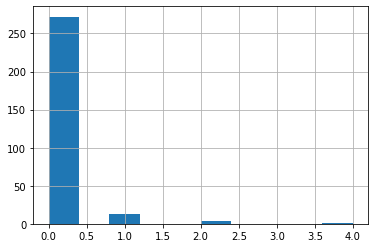

In [161]:
df_nzl_num.new_deaths.hist()
plt.plot()

In [ ]:
#total_deaths

[]

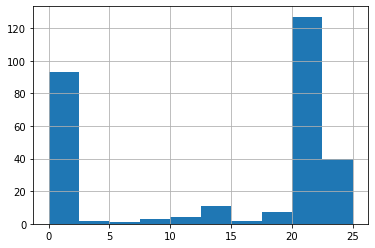

In [162]:
df_nzl_num.total_deaths.hist()
plt.plot()

In [ ]:
From the above image we see data is not normally distributed it is right skewed
deaths were high and decreased quickly and increased highly

[]

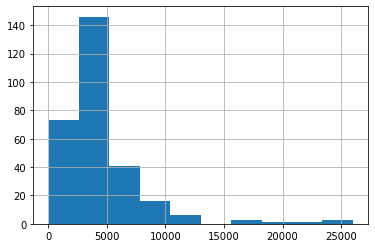

In [37]:
df_nzl_num.new_tests.hist()
plt.plot()

In [ ]:
#new tests are decreased

In [40]:
#Skewed right. A skewed right histogram looks like a lopsided mound, with a tail going off to the right:

# Bivariate analysis

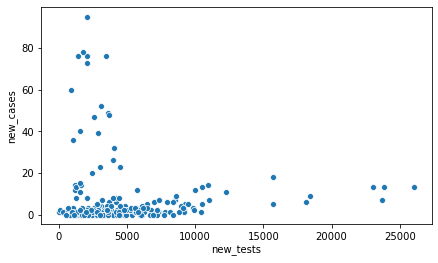

In [163]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl['new_tests'], y=df_nzl["new_cases"])

In [166]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['new_tests']).corr(df_nzl['new_cases'])

-0.013688723249981017

New_tests and New_cases are  negatively correlated ( one variable increases as the other decreases)
(we need to do new_tests to keep the new-cases low)

In [167]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['new_cases']).corr(df_nzl["new_cases_smoothed"])

0.8740647203819641

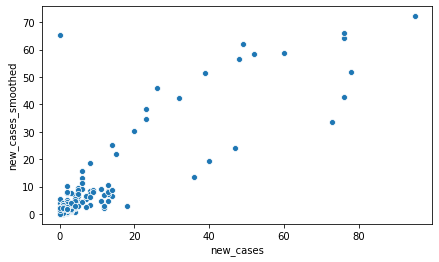

In [168]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl['new_cases'], y=df_nzl["new_cases_smoothed"])

they are corrlated we can use one feature from them and use in our dataset

In [169]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df_nzl['new_cases']).corr(df_nzl["positive_rate"])

0.9001161107311694

positive_rate increases with raise of new _cases

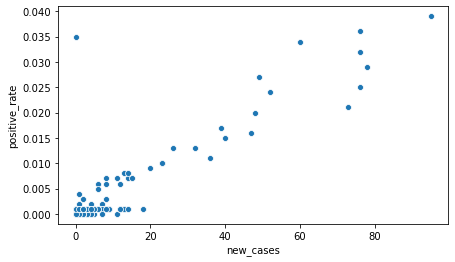

In [170]:
#no of active cases
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num["positive_rate"])

new_cases and positive _rate are correlated with each other
new_cases increases  with the rate of positivity 

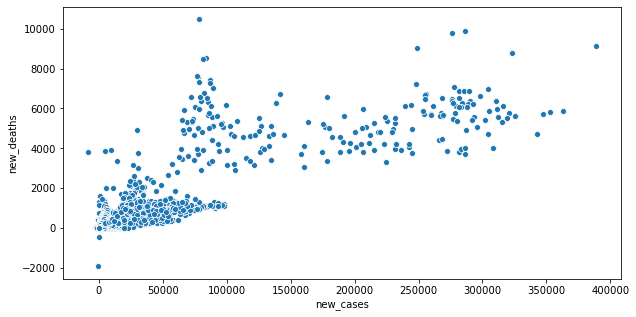

In [175]:
#number of available beds at hospital

plt.figure(figsize=(10,5))
sns.scatterplot(y=df['new_deaths'], x=df["new_cases"])


In [177]:
(df['new_deaths']).corr(df["new_cases"])

0.8800074575031986

new_deaths ae correlated with new_cases
one increase the other also increase


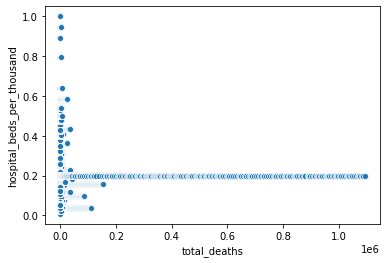

In [180]:
#plt.figure(figsize=(7,4))
sns.scatterplot(x=df['total_deaths'], y=df["hospital_beds_per_thousand"])

In [178]:
(df['total_deaths']).corr(df["hospital_beds_per_thousand"])

-0.016506375020984405

toatal_deaths and hospital_beds_per_thousand is negatively correlated with each other
number of death increases ,hospitals beds decreses

In [174]:
#corr() is used to find the pairwise correlation of all columns in the dataframe
(df['total_tests_per_thousand']).corr(df["hospital_beds_per_thousand"])

0.0807860869492623

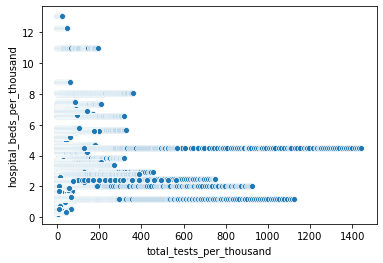

In [50]:
#plt.figure(figsize=(7,4))
sns.scatterplot(x=df['total_tests_per_thousand'], y=df["hospital_beds_per_thousand"])

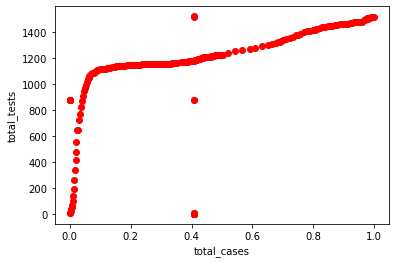

In [183]:

df_nzl_num['total_tests']=(df_nzl_num['total_tests'])/df_nzl_num['total_tests'].max()
plt.scatter(y = df_nzl_num['total_cases'], x =df_nzl_num['total_tests'], color='red')
plt.xlabel("total_cases")
plt.ylabel("total_tests")
plt.show()

In [ ]:
positive correlation -total_test and total_cases

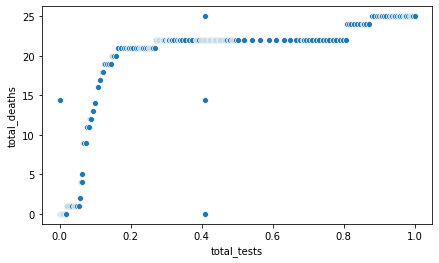

In [184]:
plt.figure(figsize=(7,4))
sns.scatterplot(y=df_nzl_num['total_deaths'], x=df_nzl_num["total_tests"])

positive correlation between total_deaths and total_tests

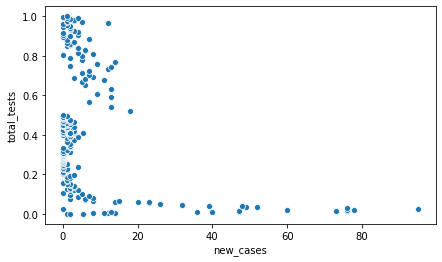

In [54]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num['total_tests'])

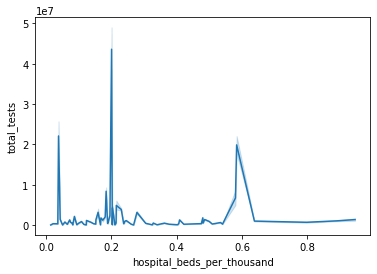

In [55]:
sns.lineplot(x=df['hospital_beds_per_thousand'], y=df["total_tests"],data=df)

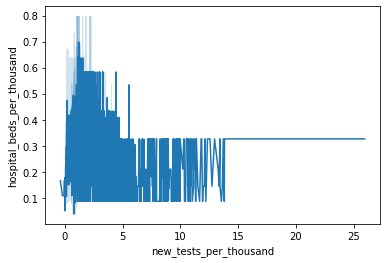

In [56]:
#new_tests_per_thousand
#line plot 
sns.lineplot(x=df['new_tests_per_thousand'], y=df["hospital_beds_per_thousand"],data=df)


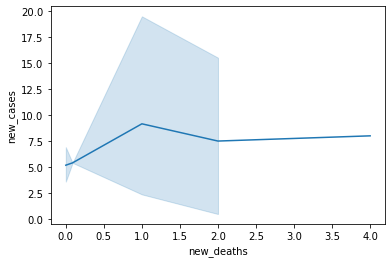

In [57]:
#line plot 
sns.lineplot(x='new_deaths',y='new_cases', data=df_nzl_num)

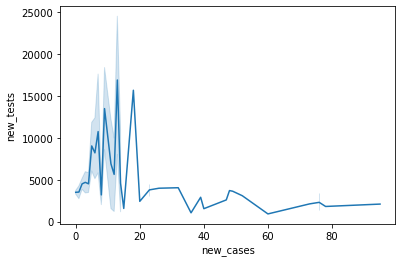

In [185]:
#line plot 
sns.lineplot(y='new_tests',x='new_cases', data=df_nzl_num)

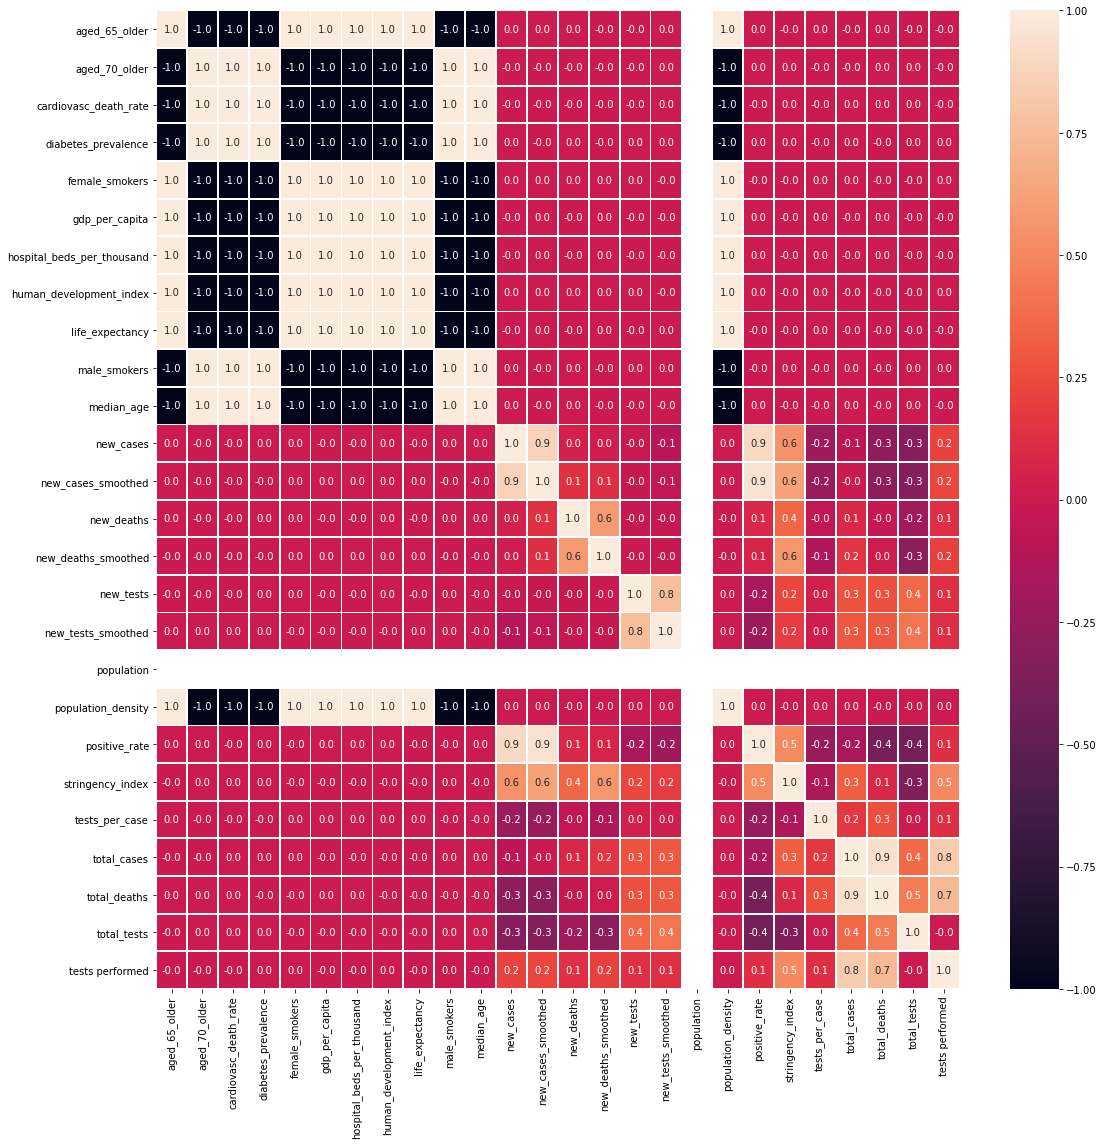

In [186]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_nzl_num.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

#age_70_older,ccardiovasc_death_rate and diabetes_prevalence are corrrelated to each  we can use one feature and drop all  other.
#female_smokers,gdp_per_capita,hospital_beds_per_thousand,hospital_bed_per_thousand,human_development_index,life_expectancy are corelated so we can use one of them for our model develpoment and drop other feature
#male_smokers and median_age are correlated with each other ,i have used "median_age"
#new_cases and new_cases_smoothed are correlated with each other ,drop new_cases_smoothed
#

In [193]:
drop_list=['cardiovasc_death_rate','diabetes_prevalence','female_smokers','gdp_per_capita','male_smokers','human_development_index',
           'life_expectancy','population','new_tests_smoothed','new_deaths_smoothed','new_cases_smoothed','aged_65_older','aged_70_older',
            'population_density']

In [194]:
df_1=df_nzl_num.drop(drop_list,axis=1)
#df_nr_1=df_nr.drop(drop_list,axis=1)

In [195]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 34882 to 35171
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hospital_beds_per_thousand  290 non-null    float64
 1   median_age                  290 non-null    float64
 2   new_cases                   290 non-null    float64
 3   new_deaths                  290 non-null    float64
 4   new_tests                   290 non-null    float64
 5   positive_rate               290 non-null    float64
 6   stringency_index            290 non-null    float64
 7   tests_per_case              290 non-null    float64
 8   total_cases                 290 non-null    float64
 9   total_deaths                290 non-null    float64
 10  total_tests                 290 non-null    float64
 11  tests performed             290 non-null    uint8  
dtypes: float64(11), uint8(1)
memory usage: 27.5 KB


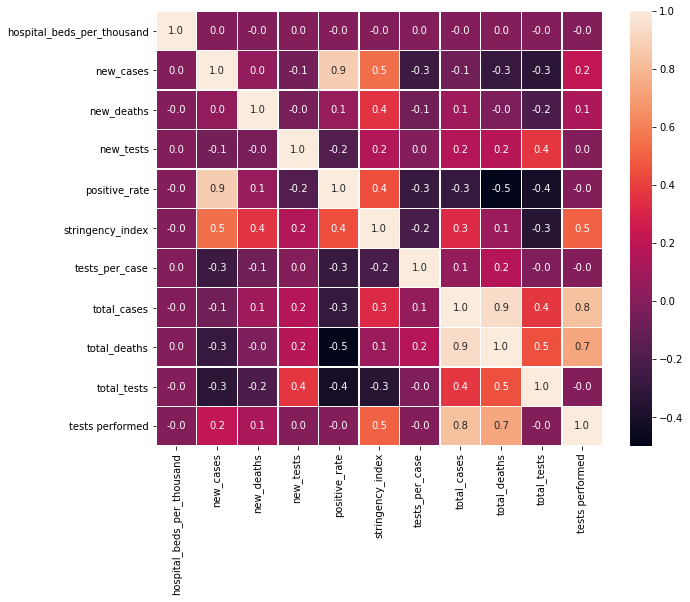

In [64]:
#correlation map
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_1.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)

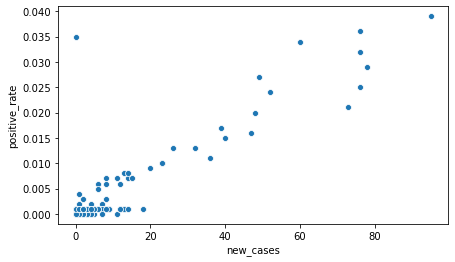

In [190]:
#no of active cases
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_nzl_num['new_cases'], y=df_nzl_num["positive_rate"])


<Figure size 864x864 with 0 Axes>

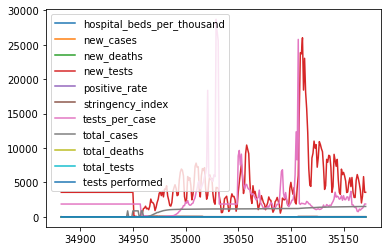

In [192]:

plt.figure(figsize=(12,12))
df_1.plot.line()